In [1]:
import cv2
import cellpose
from cellpose import models
import numpy as np
from skimage.color import rgb2gray
from skimage.measure import regionprops_table, regionprops
import matplotlib.pyplot as plt
import torch
import pandas as pd

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [3]:

input_video_path = r'C:\Users\Jack\Documents\GitHub\Sandbox\Data\Videos\50 frames.avi'

cap = cv2.VideoCapture(input_video_path)
imgs = []

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        # print(frame, ret)
        # plt.imshow(frame[:, :, 0])
        # plt.show()
        imgs.append(rgb2gray(frame))
    else:
        break

cap.release()

In [4]:
imgs = np.stack(imgs, axis=0)

In [5]:
imgs.shape

(50, 580, 780)

In [6]:
cp = models.CellposeModel(gpu=True, device=torch.device(device), pretrained_model=r'Data\Videos\human_20241212_500e')
sz = models.SizeModel(cp, device=torch.device(device))

model = models.Cellpose(gpu=True, device=torch.device(device))
model.cp = cp
model.sz = sz

In [10]:
masks = np.zeros_like(imgs)

for t in range(len(masks)):
    results = model.eval(imgs[t])
    mask, flow, style, diams = results[0], results[1][0], results[1][1], results[2]
    masks[t] = mask.astype(int)


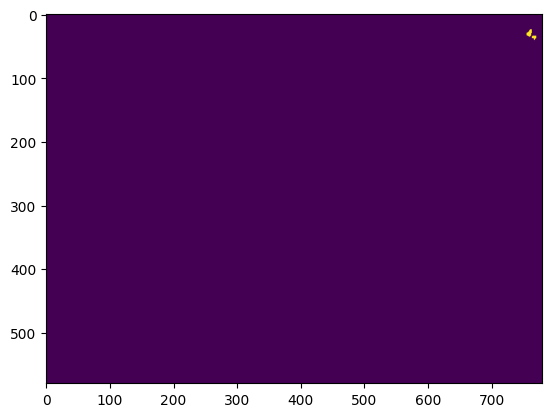

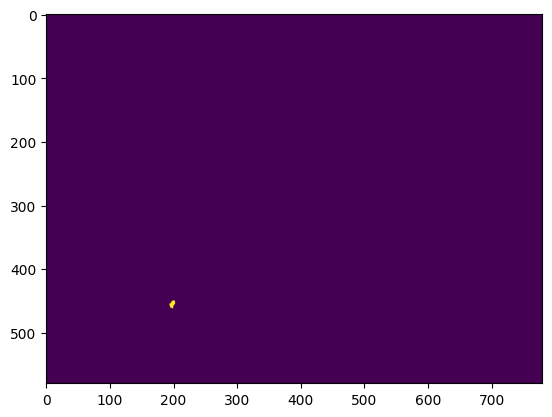

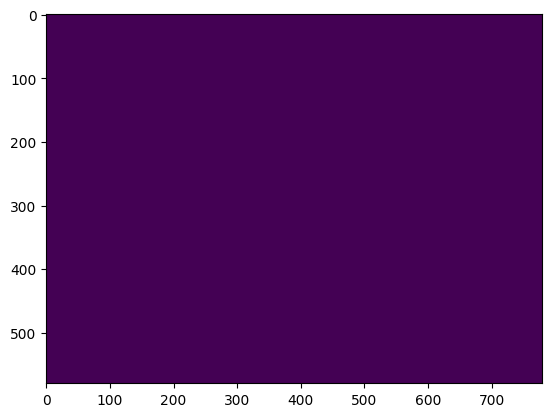

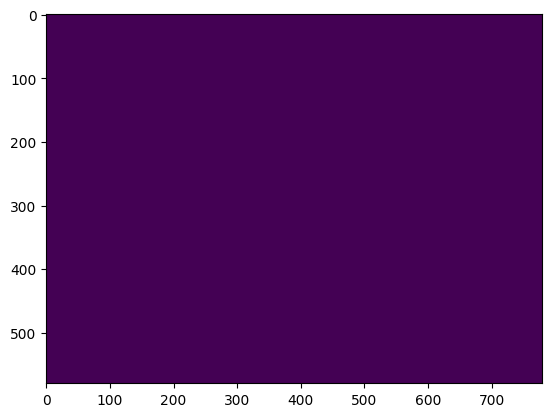

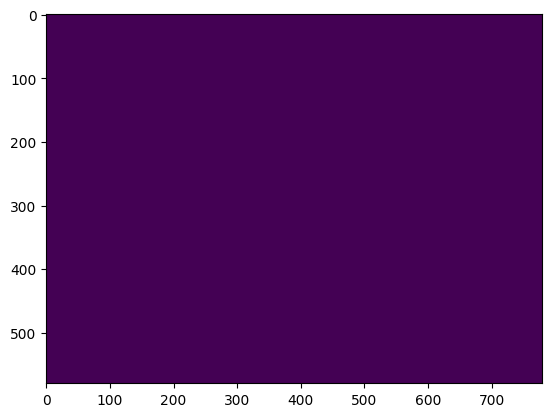

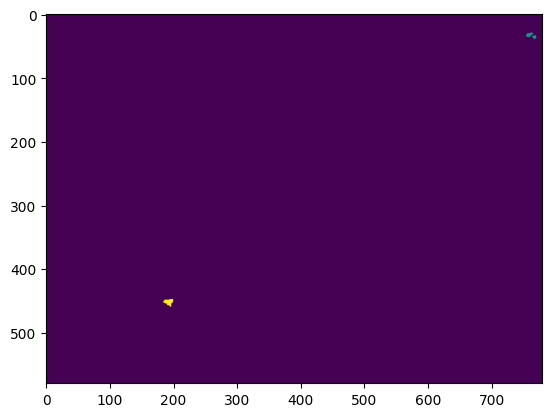

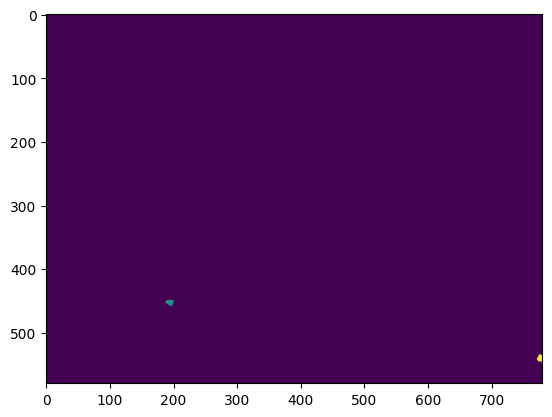

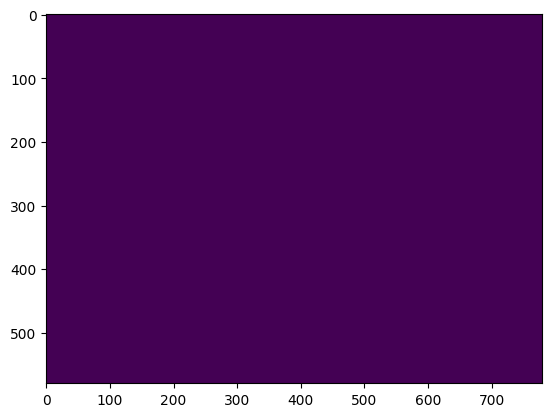

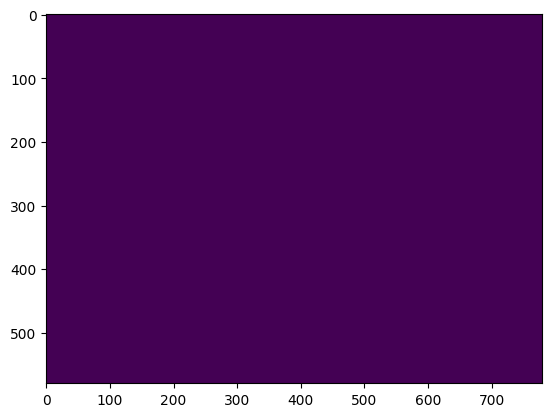

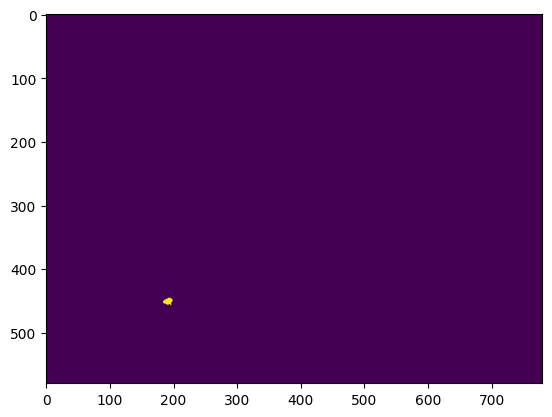

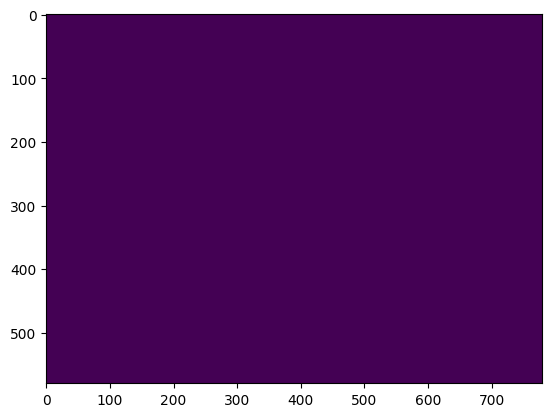

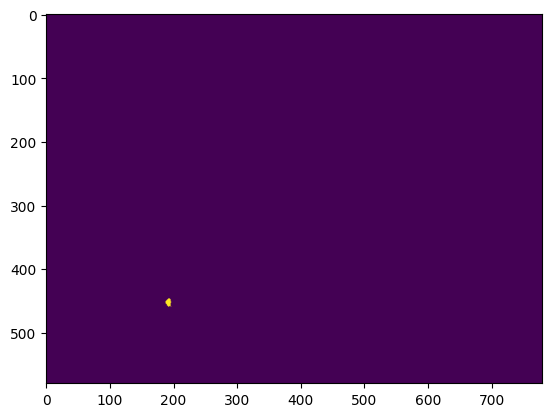

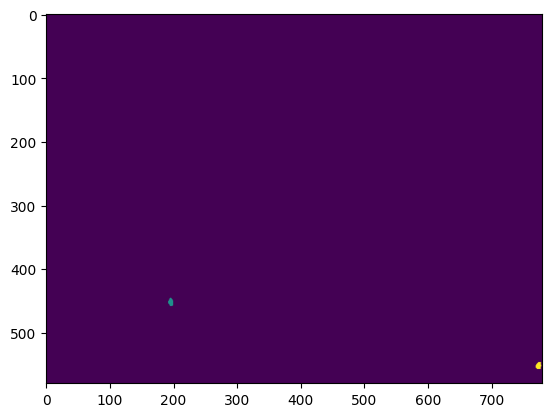

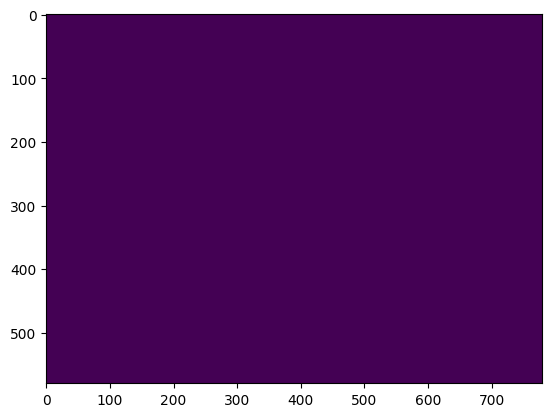

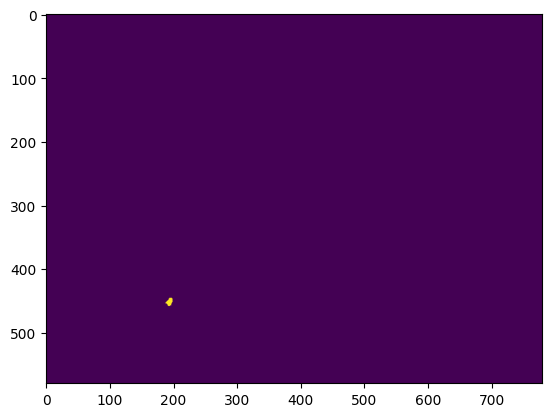

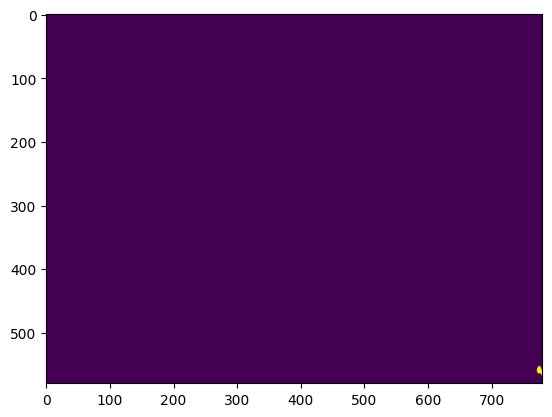

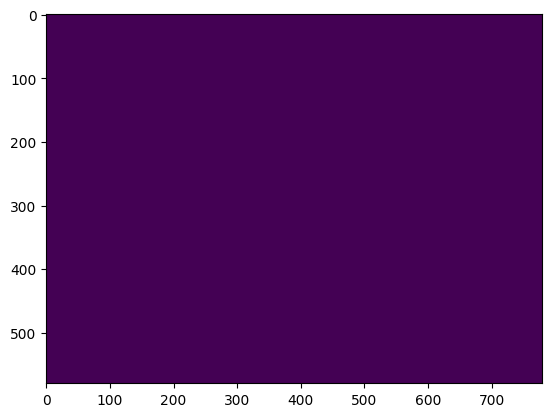

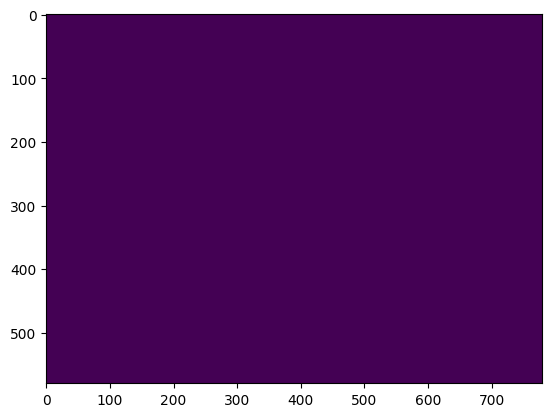

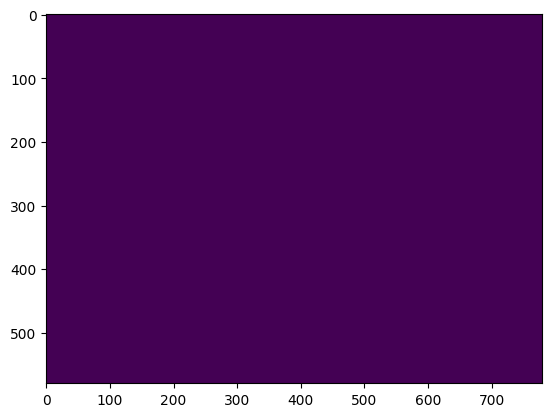

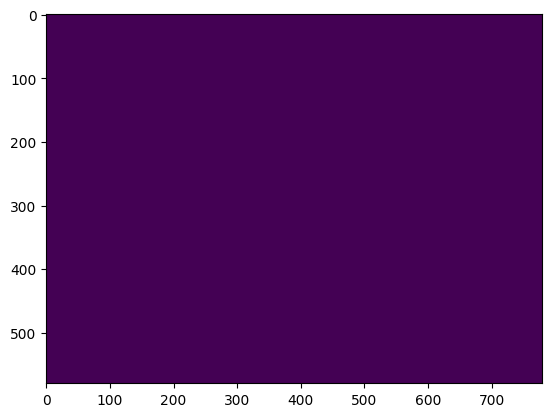

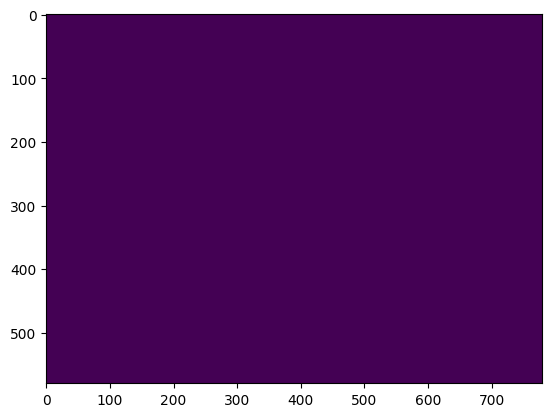

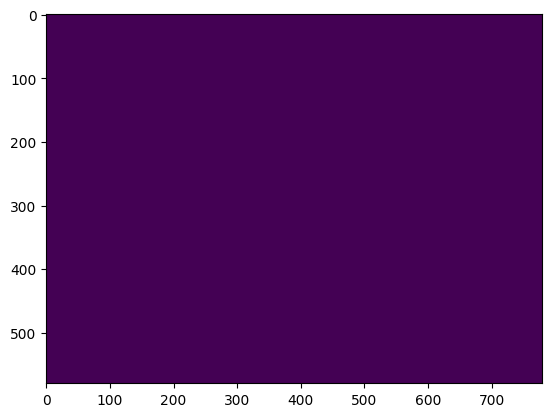

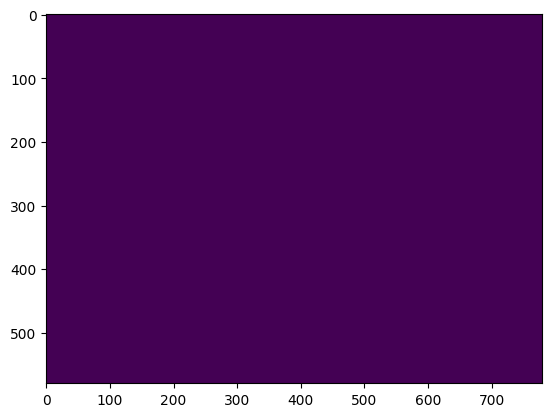

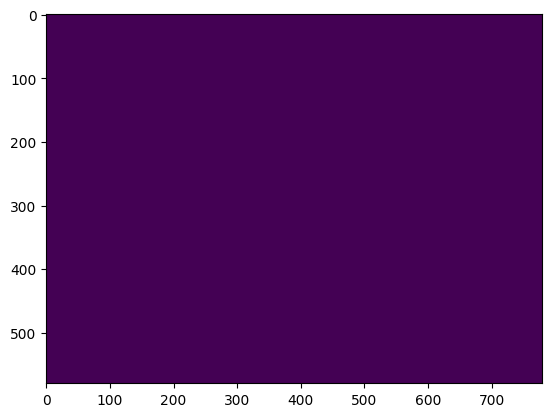

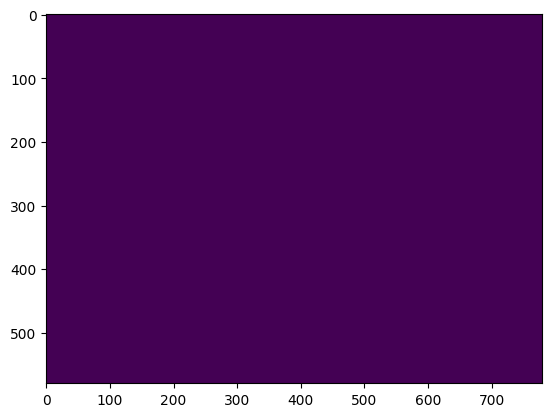

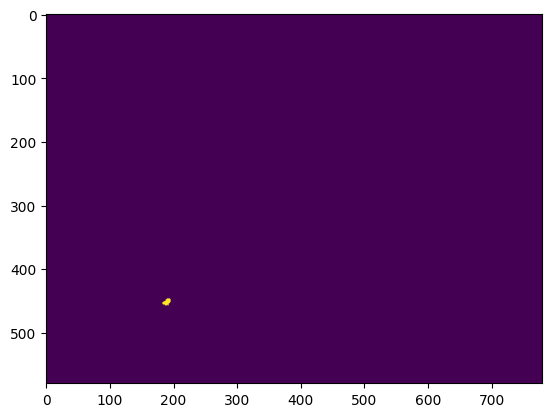

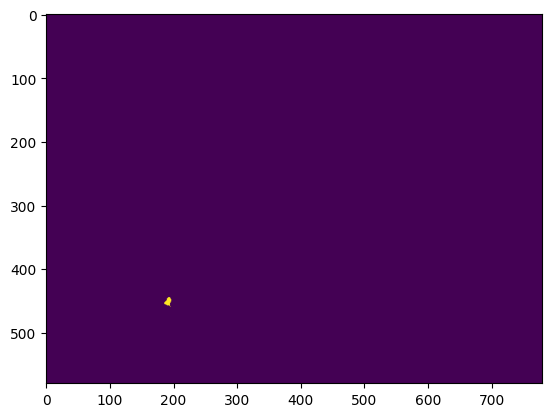

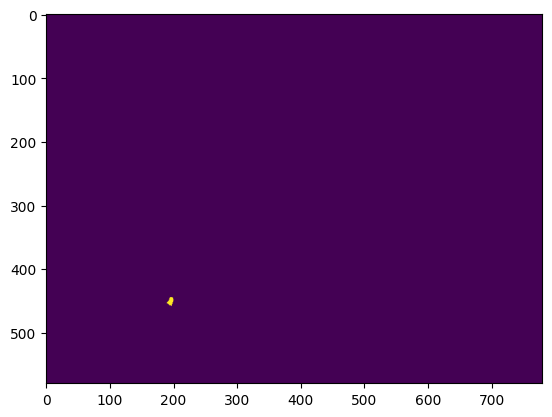

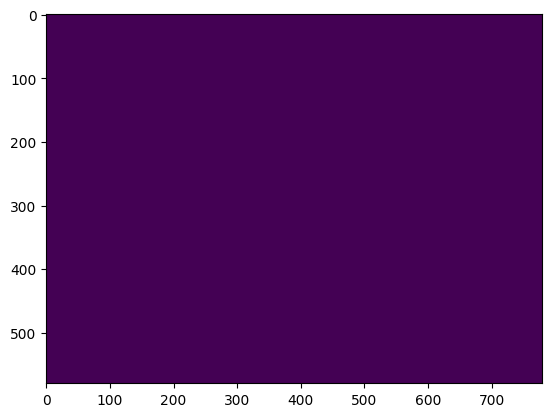

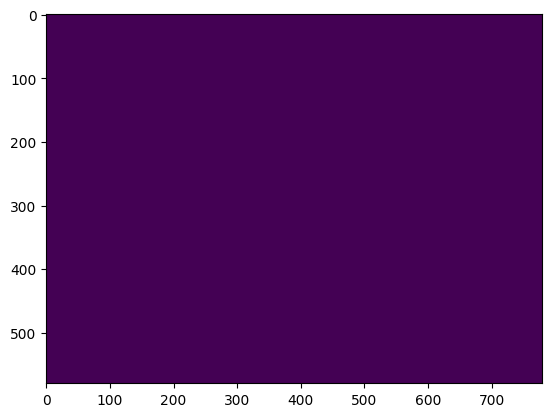

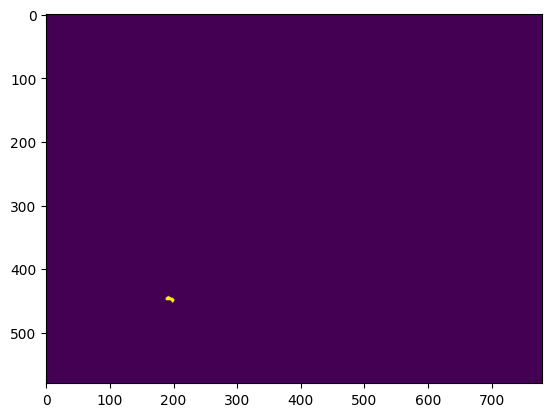

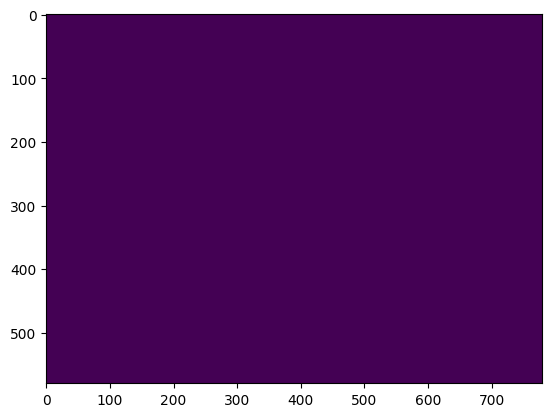

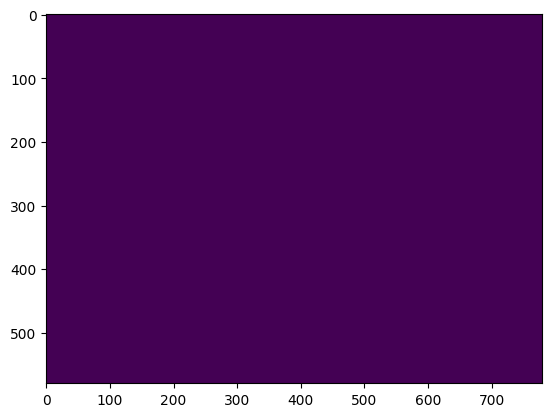

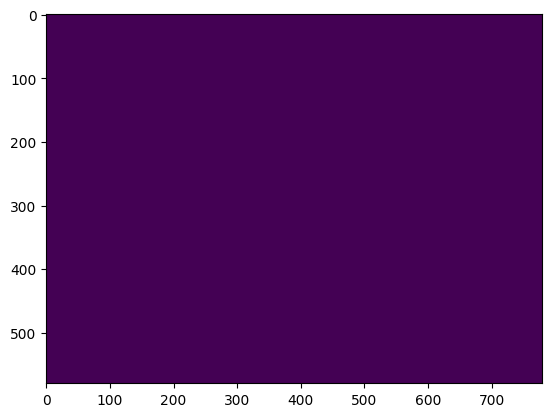

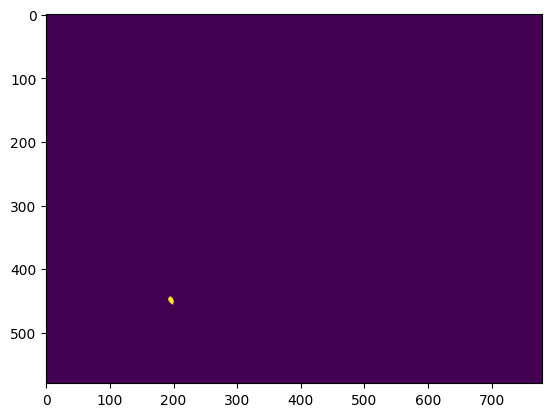

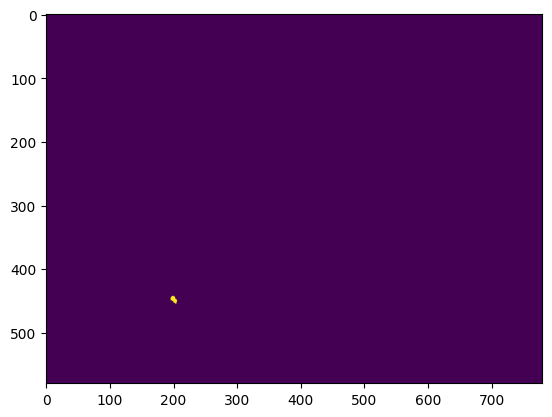

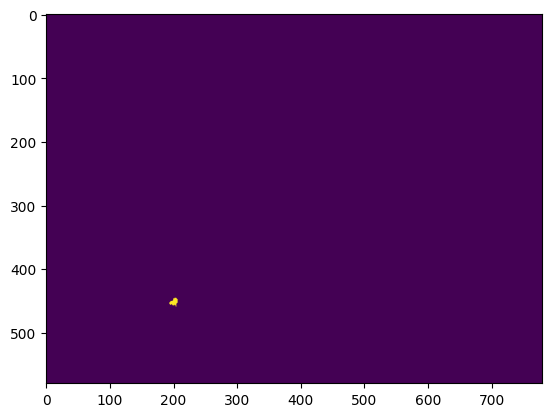

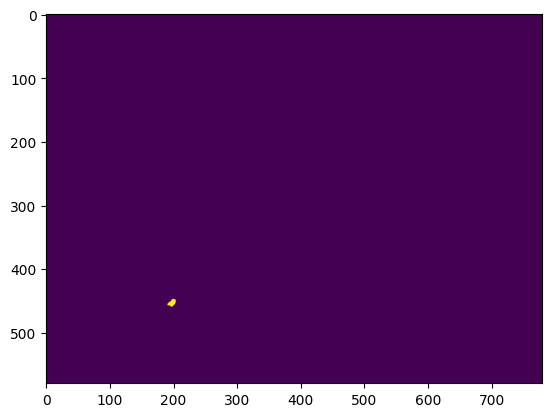

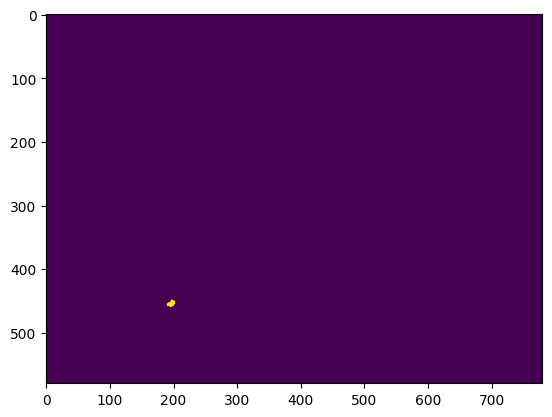

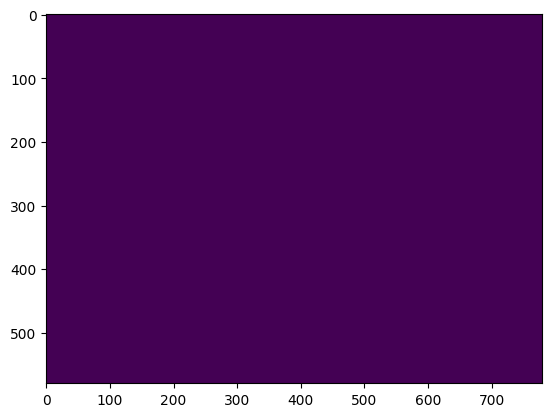

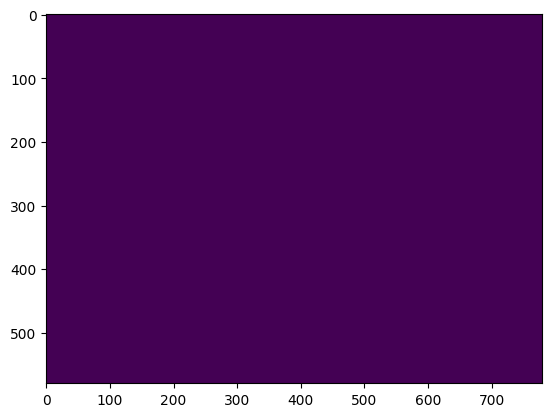

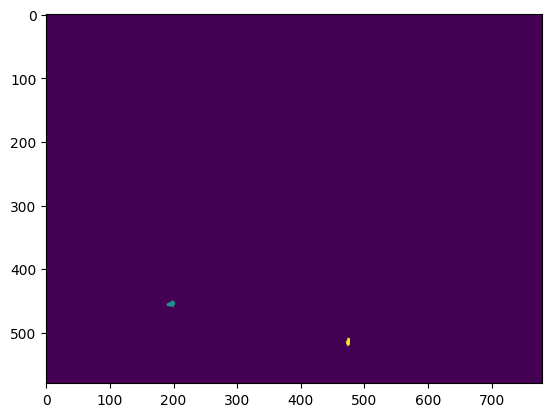

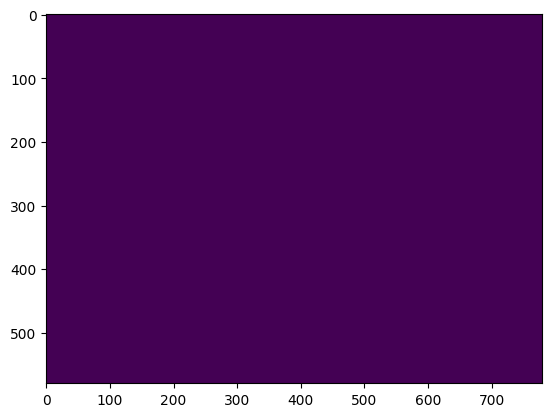

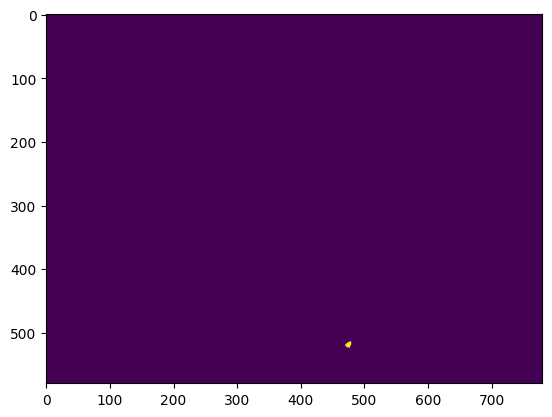

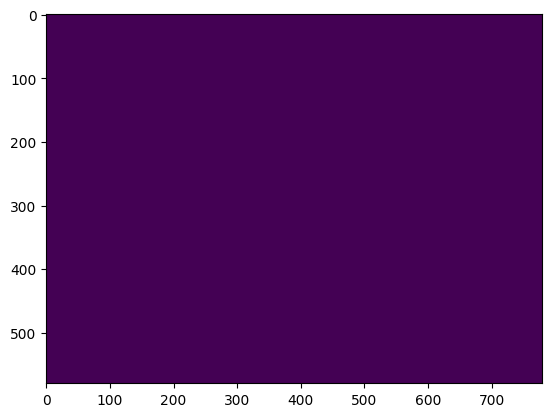

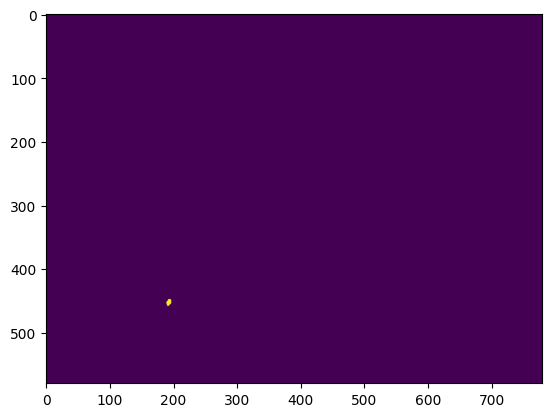

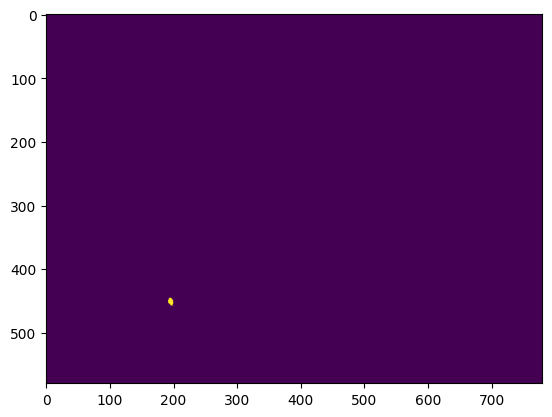

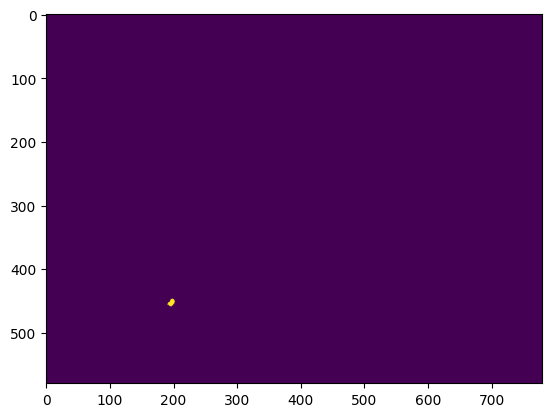

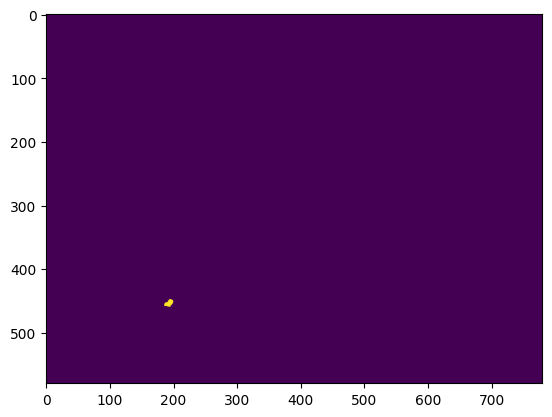

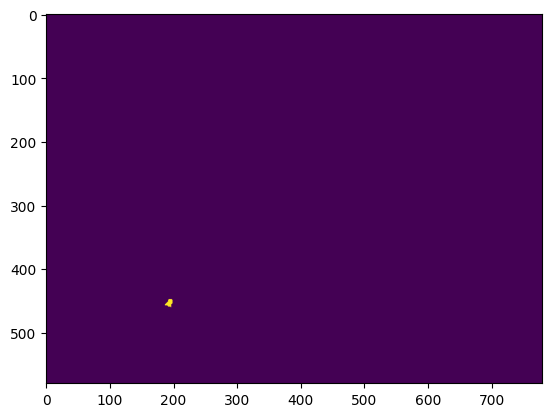

In [11]:
for t in range(len(masks)):
    plt.imshow(masks[t])
    plt.show()

In [15]:
values_to_measure = ['label', 'area', 'centroid', 'bbox']
df = None


for t in range(len(masks)):
    results = regionprops_table(masks[t].astype(int), imgs[t], values_to_measure)
    results['time'] = t
    
    if df is None:
        df = pd.DataFrame(results)
    else:
        df = pd.concat([df, pd.DataFrame(results)], ignore_index=True)

In [14]:
df

,label,bbox-0,bbox-1,bbox-2,bbox-3,time
0,1,24,755,41,771,0
1,1,450,194,463,203,1
2,1,29,755,40,771,5
3,2,448,184,460,200,5
4,1,449,188,460,201,6
5,2,535,772,548,780,6
6,1,446,184,458,199,9
7,1,447,188,460,197,11
8,1,446,192,459,200,12
9,2,547,770,558,779,12


In [16]:
df.to_csv('sperm.csv')